In [2]:
import pandas as pd
import numpy as np
import pylab as py
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cell_df=pd.read_csv("cell_samples-Copy1.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


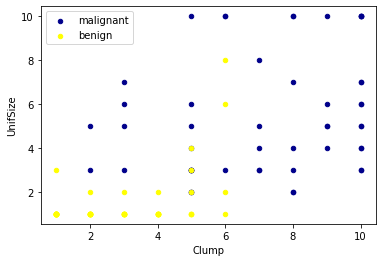

In [7]:
ax = cell_df[cell_df['Class']== 4][0:50].plot(kind = "scatter",x = 'Clump', y = 'UnifSize',color = 'DarkBlue',label ='malignant');
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='benign',ax = ax)
plt.show()

In [8]:
#dropping Non numeric rows
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors ='coerce').notnull()]
cell_df.head()
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [50]:
features_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asanyarray(features_df)
X[0:5]
cell_df['Class']=cell_df['Class'].astype('int')
y = np.asanyarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [9]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [51]:
#train / test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.6, random_state = 4)
print("Trained Set :",X_train.shape,y_train.shape)
print("Tested Set :",X_test.shape,y_test.shape)

Trained Set : (273, 9) (273,)
Tested Set : (410, 9) (410,)


In [59]:
#modelling by Using Scikit learn SVM
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
yhat = clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [97]:
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report
import itertools
def plot_confusion_matrix(cm,classes,
                         normalize = False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
        print("After Normalization")
    else:
        print("Without Normalization")
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = True,color='white')
    plt.yticks(tick_marks,classes,rotation =True,color='white')
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment = "center",
                color = 'white' if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.xlabel("Predicted",color='white',size=20)
    plt.ylabel("True",color='white',size=20)

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       265
           4       0.92      0.97      0.95       145

    accuracy                           0.96       410
   macro avg       0.95      0.96      0.96       410
weighted avg       0.96      0.96      0.96       410

Without Normalization
[[253  12]
 [  4 141]]


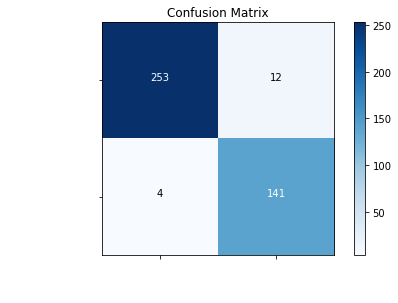

In [98]:
cnf_matrix=confusion_matrix(y_test,yhat,labels=[2,4])
np.set_printoptions(precision = 2)
print(classification_report(y_test,yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['benign(2)','malignant(4)'],normalize=False,title='Confusion Matrix')

In [100]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

0.9612003896016745

In [102]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.9609756097560975